In [2]:
import pandas as pd
import numpy as np
import chess
import chess.svg

In [244]:
data = pd.read_csv('games.csv')

In [245]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [247]:
moves = data.moves
winner = np.asarray([1*(i=='white') for i in data.winner])

In [8]:
moves.head()

0    d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1    d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2    e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3    d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4    e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
Name: moves, dtype: object

In [248]:
winner

array([1, 0, 1, ..., 1, 1, 0])

In [109]:
game

'd4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'

In [110]:
def to_chess_notation(game_str):
    
    game_moves = game_str.split(' ')
    join = 0
    new_notation = '1. '
    
    for i,move in enumerate(game_moves):
        if join != 1:
            new_notation += move + ' '
            join += 1
        else:
            new_notation += '{} {}. '.format(move, (i+3)//2)
            join = 0
            
    return new_notation
        

In [111]:
game = to_chess_notation(game)
game

'1. d4 d5 2. c4 c6 3. cxd5 e6 4. dxe6 fxe6 5. Nf3 Bb4+ 6. Nc3 Ba5 7. Bf4 '

In [43]:
board = chess.Board()

In [63]:
import chess.pgn
games = chess.pgn.read_game(open('../../data/all.pgn'))

In [112]:
games

<Game at 0x7f3be6e92fd0 ('Kasparov, Garry' vs. 'Stoffers, Jeffrey', '2000.03.14')>

In [113]:
import io

In [116]:
pgn = io.StringIO(game)

In [117]:
match = chess.pgn.read_game(pgn)

In [119]:
for move in match.mainline_moves():
    print(move)

d2d4
d7d5
c2c4
c7c6
c4d5
e7e6
d5e6
f7e6
g1f3
f8b4
b1c3
b4a5
c1f4


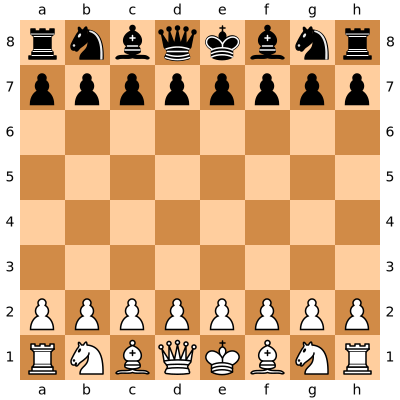

In [120]:
board

In [121]:
for move in match.mainline_moves():
    board.push(move)

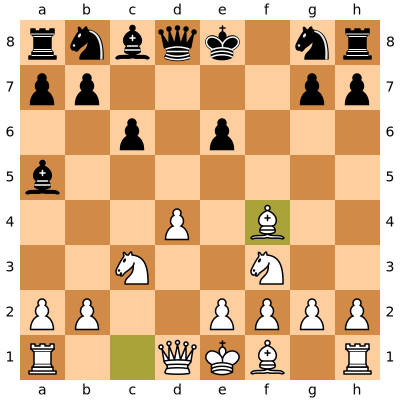

In [122]:
board

In [142]:
game = moves[1000]
game

'e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nxd4 Qxd4 Nf6 Nc3 b6 e5 Bc5 Qh4 Qe7 Qe4 Nxe4'

In [143]:
game = to_chess_notation(game)

In [156]:
game = moves[10000]

In [157]:
board.reset()

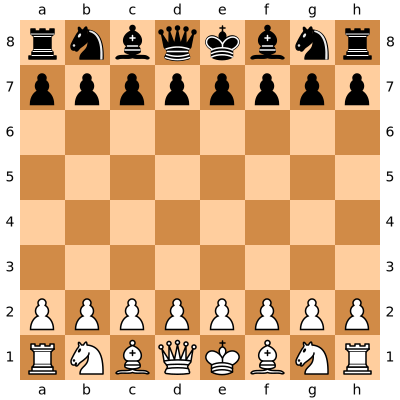

In [158]:
board

In [159]:
match = chess.pgn.read_game(io.StringIO(game))

In [160]:
for move in match.mainline_moves():
    board.push(move)

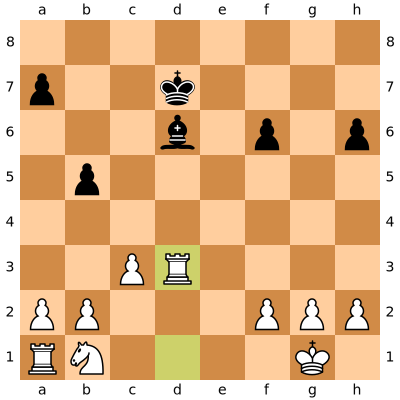

In [161]:
board

In [170]:
len(board.pieces(piece_type=chess.PAWN, color=1))

6

In [172]:
chess_pieces = [chess.PAWN, chess.KNIGHT, chess.ROOK, chess.BISHOP, chess.QUEEN]

In [177]:
for piece in chess_pieces:
    print(len(board.pieces(piece_type=piece,color=0)))

4
0
0
1
0


In [179]:
chess.PAWN + chess.KNIGHT

3

In [189]:
np.asarray([len(board.pieces(piece_type=piece, color=1))*piece for piece in chess_pieces])

array([6, 2, 8, 0, 0])

In [204]:
def eval_side(board, color): return np.asarray([len(board.pieces(piece, color))*piece for piece in chess_pieces]).sum()

In [205]:
print(eval_side(board, 1))

16


In [206]:
def simple_eval(board): return eval_side(board, 1) - eval_side(board, 0)

In [207]:
simple_eval(board)

-9

In [212]:
board.reset()

In [226]:
match = chess.pgn.read_game(io.StringIO(moves[100]))

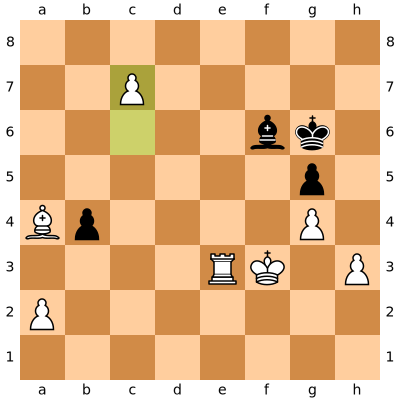

In [227]:
board.reset()
score = []
for move in match.mainline_moves():
    board.push(move)
    score.append(simple_eval(board))
board

In [230]:
np.mean(score)

-0.27722772277227725

In [231]:
import matplotlib.pyplot as plt

In [238]:
def get_mean_score(game):
    board = chess.Board()
    score = []
    match = chess.pgn.read_game(io.StringIO(game))
    for move in match.mainline_moves():
        board.push(move)
        score.append(simple_eval(board))
    return np.mean(score)

In [254]:
data = np.array([get_mean_score(game) for game in moves])

In [255]:
data.mean()

-0.016297429904939174

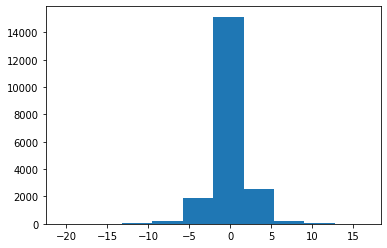

In [256]:
plt.hist(data)
plt.show()

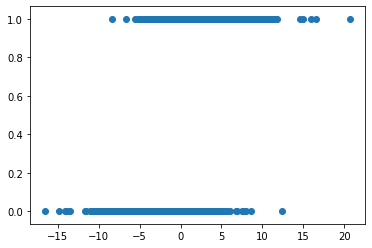

In [259]:
plt.scatter(-1*data, winner)